In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [34]:
test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
test.head()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
train.Age.value_counts()

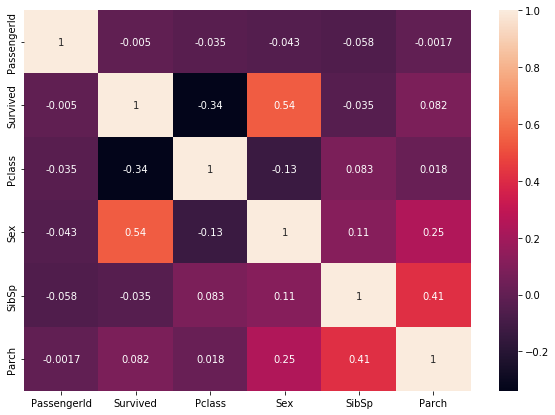

In [33]:
plt.figure(figsize = (10,7))
sns.heatmap(train.corr(),annot = True)

In [25]:
train.drop(['Name','Age','Ticket','Fare','Cabin'], inplace=True, axis = 1)
test.drop(['Name','Age','Ticket','Fare','Cabin'], inplace=True, axis = 1)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Embarked       889 non-null object
dtypes: int64(5), object(2)
memory usage: 48.8+ KB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
SibSp          418 non-null int64
Parch          418 non-null int64
Embarked       418 non-null object
dtypes: int64(4), object(2)
memory usage: 19.7+ KB


In [28]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
data = [train,test]

for dataset in data:
    dataset.Embarked = dataset.Embarked.fillna('C')

In [30]:
gender = {'male':0,'female':1}

for datas in data:
    datas['Sex']=datas['Sex'].map(gender)
          

In [12]:
train.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [13]:
embark = {'S':0,'C':1,'Q' :2}

for datas in data:
    datas['Embarked']=datas['Embarked'].map(embark)

In [66]:
train.Embarked.value_counts()

0    644
1    170
2     77
Name: Embarked, dtype: int64

In [14]:
X_train = train.drop(['Survived','PassengerId'], axis = 1)

Y_train = train['Survived']
                     
X_test =  test.drop(['PassengerId'], axis = 1)

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=46)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [20]:
acc_logistic = round(clf.score(X_train, Y_train)*100, 3)

print(acc_logistic)

80.247
